In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('jeju_tourspots.xlsx')
df.head()

,type,place,latitude,longitude,timecost,satisfaction
0,view,성산일출봉,33.458715,126.941939,90,3
1,view,금오름,33.351591,126.304954,90,1
2,view,교래휴양림,33.441715,126.666791,90,2
3,view,한라산영실코스,33.348627,126.495965,90,2
4,view,곶자왈,33.282901,126.273408,90,1


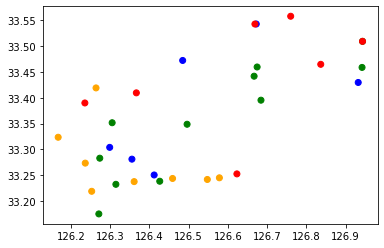

In [29]:
colors = {'view':'green', 'walk':'orange', 'museum':'blue', 'activity':'red'}

fig, ax = plt.subplots()
ax.scatter(df['longitude'], df['latitude'], c=df['type'].map(colors))

plt.show()

In [17]:
import math

result = []

for i in range(df.shape[0]):
    latitude = df.iloc[i].latitude
    longitude = df.iloc[i].longitude
    
    n = i + 1
    while n < df.shape[0]:
        lat_diff = latitude - df.iloc[n].latitude
        long_diff = longitude - df.iloc[n].longitude
        
        distance = math.sqrt(math.pow(lat_diff, 2) + math.pow(long_diff, 2))
        result.append([df.iloc[i].place, df.iloc[n].place, distance])
        n += 1

result

[['성산일출봉', '금오름', 0.6459299045569978],
 ['성산일출봉', '교래휴양림', 0.2756726716669621],
 ['성산일출봉', '한라산영실코스', 0.4593606169666763],
 ['성산일출봉', '곶자왈', 0.6912628013693493],
 ['성산일출봉', '산방산용머리해안', 0.6670713338624311],
 ['성산일출봉', '사려니숲길', 0.26533459924405844],
 ['성산일출봉', '우도', 0.050534849608956545],
 ['성산일출봉', '가파도', 0.7284588904063226],
 ['성산일출봉', '올레15코스', 0.6792436458076004],
 ['성산일출봉', '올레13코스', 0.7863010683427929],
 ['성산일출봉', '올레12코스', 0.7294749705260666],
 ['성산일출봉', '올레11코스', 0.7296786705290257],
 ['성산일출봉', '올레9코스', 0.6215819180124286],
 ['성산일출봉', '올레8코스', 0.528721140342437],
 ['성산일출봉', '올레7코스', 0.450159613311764],
 ['성산일출봉', '올레6코스', 0.42182300949094803],
 ['성산일출봉', '스위스마을', 0.2674573159534158],
 ['성산일출봉', '주상절리', 0.5608054013407874],
 ['성산일출봉', '전이수갤러리', 0.28248727943927887],
 ['성산일출봉', '넥슨컴퓨터박물관', 0.4574267539978402],
 ['성산일출봉', '피규어박물관', 0.6128953102545315],
 ['성산일출봉', '유민미술관', 0.030748774577209495],
 ['성산일출봉', '테디베어박물관', 0.5693933580583828],
 ['성산일출봉', '항공우주박물관', 0.6615940441388553],
 ['

In [36]:
# 소요시간: 거리 x 150 (min)

time = 480 # 8 hours
current = 0

spots = df.to_numpy()
path = [current]
time_cost = [0]

while time > 0:
    score_array = np.zeros(len(spots))
    time_array = np.zeros(len(spots))
    
    latitude = spots[current][2]
    longitude = spots[current][3]
    
    for i in range(len(spots)):
        if i in path:
            continue
        lat_diff = latitude - spots[i][2]
        long_diff = longitude - spots[i][3]
        
        distance = math.sqrt(math.pow(lat_diff, 2) + math.pow(long_diff, 2))
        travel_time = (distance * 150) + spots[i][4]
        if travel_time > time:
            continue
        
        score_array[i] = (spots[i][4] * spots[i][5]) / travel_time
        time_array[i] = travel_time
        
    if sum(score_array) == 0:
        break
    next_spot = np.argmax(score_array)
    path.append(next_spot)
    time_cost.append(time_array[next_spot])
    current = next_spot
    time -= time_array[next_spot]

for j in range(len(path)):
    print(spots[path[j]][1])
    print(time_cost[j])

성산일출봉
0
우도
97.58022744134348
레일바이크
107.3131376077533
전이수갤러리
87.30229426568414
투명카약
134.1733535899471
